In [4]:
%matplotlib inline

# Dependencies and set-up
import pandas as pd
import requests
import json
from config import api_key
from pprint import pprint
from datetime import date
from matplotlib import pyplot as plt
import numpy as np
import gmaps
from config import g_key
import scipy.stats as stats
from datetime import date

In [35]:
# Import .csv of covid-19 data that we created in main.ipynb
covid_pop_data = pd.read_csv('Resources/covid_pop.csv')
# Create dataframe from imported data
covid_pop_df = pd.DataFrame(covid_pop_data)
covid_pop_df

,State,Population,Confirmed Cases,Deaths,"Cases Per 100,000","Deaths Per 100,000",Death Rate
0,Alabama,4903185,4345,133,88.615869,2.712523,0.030610
1,Alaska,731545,300,9,41.009097,1.230273,0.030000
2,Arizona,7278717,4237,150,58.210808,2.060803,0.035402
3,Arkansas,3017804,1620,37,53.681419,1.226057,0.022840
4,California,39512223,27677,957,70.046679,2.422035,0.034577
5,Colorado,5758736,8286,355,143.885742,6.164547,0.042843
6,Connecticut,3565287,15884,971,445.518131,27.234834,0.061131
7,Delaware,973764,2070,55,212.577175,5.648186,0.026570
8,Florida,21477737,23343,668,108.684635,3.110197,0.028617
9,Georgia,10617423,15669,587,147.578184,5.528649,0.037463


# COMPARE CALIFORNIA TO THE REST OF THE NATION

In this portion of our analysis we compare the state of California to the rest of the nation in order to determine whether we as a state are doing better, worse than, or equal to the rest of the nation. 

In [12]:
# Import the time series data for California vs. the rest of the nation from main.ipynb
cali_national_data = pd.read_csv('Resources/cali_national.csv', index_col=0)

# Dataframe of .csv data
cali_national_df = pd.DataFrame(cali_national_data)

In [16]:
# Dataframe of daily percent change in cases for USA, California and (USA-California)
percent_change = cali_national_df.pct_change()

# Add column for the difference between california and the rest of the nation
percent_change['Difference'] = abs((percent_change['Rest of Nation'] - percent_change['California']))

# Dataframe of daily change in cases for USA, California and (USA-California)
daily_diff = cali_national_df.diff()

# Store the total us population count
total_population = covid_pop_df['Population'].sum()

# Store Californias population count
cali_population = covid_pop_df.loc[covid_pop_df['State'] == 'California', 'Population'].sum()

# Store the current date
todays_date = date.today().strftime('%m/%d/%y')

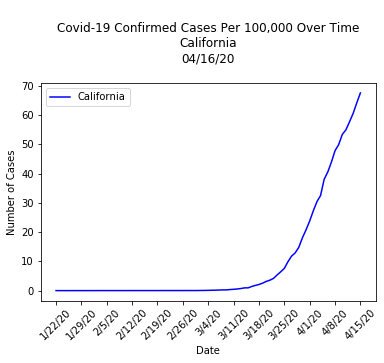

In [19]:
# Plot a time series of the number of cases per 100,000 for California
cali_line = plt.plot(cali_national_df['California']/cali_population*100000, label='California', color='blue')
# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Covid-19 Confirmed Cases Per 100,000 Over Time
California
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_cases_time', bbox_inches='tight')

plt.show()

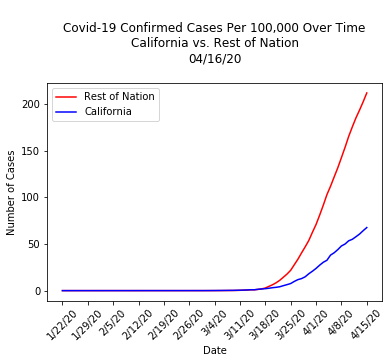

In [21]:
# Plot a time series of the number of cases per 100,000 for California vs the rest of the nation
rest_of_line = plt.plot(cali_national_df['Rest of Nation']/(total_population-cali_population)*100000, label='Rest of Nation', color='red')
cali_line = plt.plot(cali_national_df['California']/cali_population*100000, label='California', color='blue')

# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Covid-19 Confirmed Cases Per 100,000 Over Time
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_cases', bbox_inches='tight')

# Display plot
plt.show()

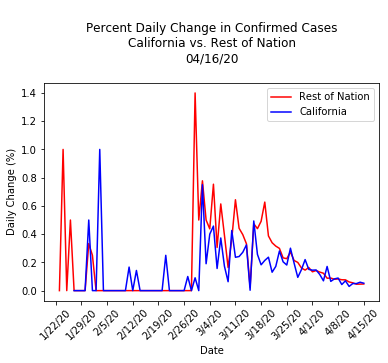

In [30]:
# Plot a time series of the percent daily change in total cases for California vs the rest of the nation
rest_of_line = plt.plot(percent_change['Rest of Nation'], label='Rest of Nation', color='red')
cali_change_line = plt.plot(percent_change['California'], label='California', color='blue')


# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Percent Daily Change in Confirmed Cases
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_percent', bbox_inches='tight')

# Display plot
plt.show()

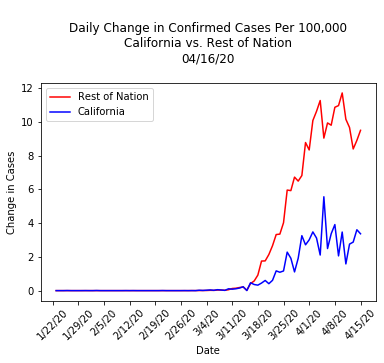

In [31]:
# Plot a time series of the daily change in total cases per capita for California vs the rest of the nation
rest_diff_line = plt.plot(daily_diff['Rest of Nation']/(total_population-cali_population)*100000, label = 'Rest of Nation', color='red')
cali_diff_line = plt.plot(daily_diff['California']/cali_population*100000, label = 'California', color='blue')

# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Daily Change in Confirmed Cases Per 100,000
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Change in Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_diff', bbox_inches='tight')

# Display plot
plt.show()



In [33]:
# Test for statistical significance between California and the rest of the nation for daily changes in confirmed cases
stats.ttest_1samp(daily_diff['California'][1:], daily_diff['Rest of Nation'][1:].mean())

t_test = stats.ttest_ind(daily_diff['California'][1:], daily_diff['Rest of Nation'][1:], equal_var=False)
# Store the p-value
p_value = t_test[1]

# Check if the p-value is below our level of significance and print message accordingly
if p_value < 0.05:
    print(f'P-value: {p_value}. We reject the null hypothesis.')
else:
    print(f'P-value: {p_value}. We are unable to reject the null hypothesis.')

P-value: 3.0968415149205147e-07. We reject the null hypothesis.
